In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import PCA # Principal Component Analysis module
from sklearn.cluster import KMeans # KMeans clustering 
import matplotlib.pyplot as plt # Python defacto plotting library
import seaborn as sns # More snazzy plotting library
%matplotlib inline 

In [2]:
df6 = pd.read_csv('order_cate_01.csv') 
df6.head()

,user_id,Salad In The Box,SteakHolder,ANWAR BURGER,สมใจ ลูกชิ้นทอด,น้องแนนหมูปิ้ง,ปังเย็น,เครื่องดื่ม ยำผลไม้ ผลไม้,ข้าวแกงชุดอิ่มอร่อย,ตำยำย่าง อาหารอีสาน ลาบยโส,...,ผัดไท หอยทอด ราดหน้า,ข้าวหน้าเป็ด-ข้าวหมูแดง-ข้าวหมูกรอบ,ข้าวยำไก่ย่าง ข้าวมันไก่ 2 สี,แชมป์ฮั้งเพ้ง,ชาย 4 บะหมี่เกี๊ยว,ร้าน 3 ป. ขาหมู อาหารตามสั่ง,อาหารอิสลาม Halal Food,ร้านอาหารตามสั่งอิ่มอร่อย,พินิจโต้รุ่ง,Cluster
0,96,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,134,0,0,0,1,0,1,1,0,0,...,0,0,1,0,1,0,0,1,1,0
2,18,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
3,286,0,1,1,1,0,1,1,1,1,...,0,0,0,0,0,1,0,0,0,0
4,52,0,0,1,1,1,1,0,1,1,...,0,0,0,0,0,1,1,0,0,0


In [3]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

NameError: name 'datasets' is not defined

In [5]:
pca = decomposition.PCA()
pca_transformed = pca.fit_transform(X_scaled)
plot3clusters(pca_transformed[:,:2], 'PCA', 'PC')  

NameError: name 'decomposition' is not defined

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 10, cost: 383.0
Run 1, iteration: 2/100, moves: 7, cost: 376.0
Run 1, iteration: 3/100, moves: 6, cost: 373.0
Run 1, iteration: 4/100, moves: 0, cost: 373.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 2, cost: 416.0
Run 2, iteration: 2/100, moves: 4, cost: 413.0
Run 2, iteration: 3/100, moves: 0, cost: 413.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 7, cost: 379.0
Run 3, iteration: 2/100, moves: 0, cost: 379.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 8, cost: 379.0
Run 4, iteration: 2/100, moves: 7, cost: 371.0
Run 4, iteration: 3/100, moves: 0, cost: 371.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 3, 

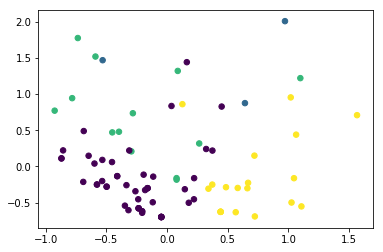

In [11]:
import numpy as np
from kmodes.kmodes import KModes
from sklearn.decomposition import PCA


x = df6.reset_index().values

km = KModes(n_clusters=4, init='Huang', n_init=5, verbose=1)
clusters = km.fit_predict(x)
df6['Cluster'] = clusters



pca = PCA(2)

# Turn the dummified df into two columns with PCA
plot_columns = pca.fit_transform(df6.ix[:,1:20])

# Plot based on the two dimensions, and shade by cluster label
plt.scatter(x=plot_columns[:,1], y=plot_columns[:,0], c=df6["Cluster"], s=30)
plt.show()

In [22]:
df7=df6.ix[:,1:20]

In [24]:

import pandas as pd
import pylab as pl
from sklearn import datasets

# normalize data
from sklearn import preprocessing
data_scaled = pd.DataFrame(preprocessing.scale(df7),columns = df7.columns) 

# PCA
pca = PCA(n_components=2)
plot = pca.fit_transform(df7.ix[:,:])

# Dump components relations with features:
print(pd.DataFrame(pca.components_,columns=data_scaled.columns,index = ['PC-1','PC-2']))



      Salad In The Box  SteakHolder  ANWAR BURGER  สมใจ ลูกชิ้นทอด  \
PC-1         -0.005507    -0.058086      0.319134         0.400512   
PC-2          0.124542     0.157709     -0.100265         0.226526   

      น้องแนนหมูปิ้ง   ปังเย็น  เครื่องดื่ม ยำผลไม้ ผลไม้  \
PC-1        0.390367  0.329326                   0.325568   
PC-2       -0.372597  0.141039                   0.220909   

      ข้าวแกงชุดอิ่มอร่อย  ตำยำย่าง อาหารอีสาน ลาบยโส  ศิริรัตน์ โจ้ก ข้าวต้ม  \
PC-1             0.062352                    0.339705                0.036277   
PC-2            -0.029284                    0.044360               -0.112978   

      ผัดไท หอยทอด ราดหน้า  ข้าวหน้าเป็ด-ข้าวหมูแดง-ข้าวหมูกรอบ  \
PC-1              0.186652                             0.145232   
PC-2             -0.032286                             0.087253   

      ข้าวยำไก่ย่าง ข้าวมันไก่ 2 สี  แชมป์ฮั้งเพ้ง  ชาย 4 บะหมี่เกี๊ยว  \
PC-1                       0.092251       0.020913            0.047986   
PC-2       

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5, cost: 349.0
Run 1, iteration: 2/100, moves: 4, cost: 343.0
Run 1, iteration: 3/100, moves: 0, cost: 343.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 16, cost: 389.0
Run 2, iteration: 2/100, moves: 4, cost: 377.0
Run 2, iteration: 3/100, moves: 3, cost: 372.0
Run 2, iteration: 4/100, moves: 0, cost: 372.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 3, cost: 393.0
Run 3, iteration: 2/100, moves: 0, cost: 393.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 14, cost: 382.0
Run 4, iteration: 2/100, moves: 0, cost: 382.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 17, cost: 396.0
Run 5, iteration: 2/100, moves: 7

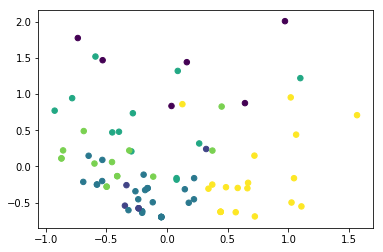

In [61]:
import numpy as np
from kmodes.kmodes import KModes
from sklearn.decomposition import PCA

# km = KModes(n_clusters=4, init='Huang', n_init=5, verbose=1)

# clusters = km.fit_predict(df6)

# Print the cluster centroids

# df_dummy = pd.get_dummies(df6)
# df_dummy
#transform into numpy array
x = df6.reset_index().values

km = KModes(n_clusters=6, init='Huang', n_init=5, verbose=1)
clusters = km.fit_predict(x)
df6['clusters'] = clusters



pca = PCA(2)

# Turn the dummified df into two columns with PCA
plot_columns = pca.fit_transform(df6.ix[:,1:20])

# Plot based on the two dimensions, and shade by cluster label
plt.scatter(x=plot_columns[:,1], y=plot_columns[:,0], c=df6["clusters"], s=30)
plt.show()

In [62]:
KModes.est

AttributeError: type object 'KModes' has no attribute 'est'

In [44]:
from sklearn.preprocessing import MinMaxScaler
iris = datasets.load_iris()
X = df7.ix[:,:]
y = df6['clusters']
target_names = ['0','1','2','3','4','5']

scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 19)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 40        
_________________________________________________________________
dense_10 (Dense)             (None, 19)                57        
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________
None


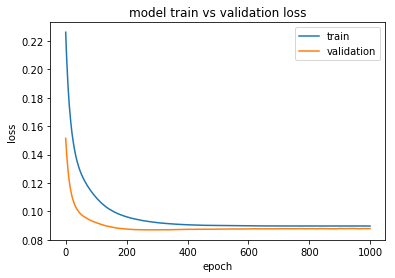

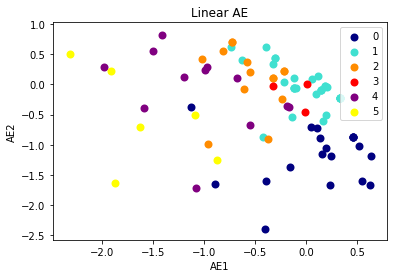

In [46]:
from keras.layers import Input, Dense
from keras.models import Model
#create an AE and fit it with our data using 3 neurons in the dense layer using keras' functional API
input_dim = X_scaled.shape[1]
encoding_dim = 2  
input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='linear')(input_img)
decoded = Dense(input_dim, activation='linear')(encoded)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
print(autoencoder.summary())

history = autoencoder.fit(X_scaled, X_scaled,
                epochs=1000,
                batch_size=16,
                shuffle=True,
                validation_split=0.1,
                verbose = 0)

#plot our loss 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# use our encoded layer to encode the training input
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))
encoded_data = encoder.predict(X_scaled)

plot3clusters(encoded_data[:,:2], 'Linear AE', 'AE')  

In [45]:
def plot3clusters(X, title, vtitle):
    plt.figure()
    colors = ['navy', 'turquoise', 'darkorange', 'red', 'purple','yellow']
    lw = 2

    for color, i, target_name in zip(colors, [0, 1, 2,3,4,5], target_names):
        plt.scatter(X[y == i, 0], X[y == i, 1], color=color, alpha=1., lw=lw,label=target_name)
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title(title)  
    plt.xlabel(vtitle + "1")
    plt.ylabel(vtitle + "2")
    plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 19)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 40        
_________________________________________________________________
dense_12 (Dense)             (None, 19)                57        
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________
None


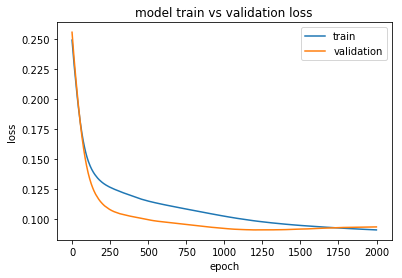

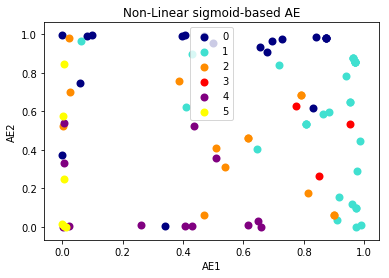

In [47]:
#create an AE and fit it with our data using 3 neurons in the dense layer using keras' functional API
input_dim2 = X_scaled.shape[1]
encoding_dim2 = 2  
input_img2 = Input(shape=(input_dim2,))
encoded2 = Dense(encoding_dim2, activation='sigmoid')(input_img2)
decoded2 = Dense(input_dim2, activation='sigmoid')(encoded2)
autoencoder2 = Model(input_img2, decoded2)
autoencoder2.compile(optimizer='adam', loss='mse')
print(autoencoder2.summary())

history2 = autoencoder2.fit(X_scaled, X_scaled,
                epochs=2000,
                batch_size=16,
                shuffle=True,
                validation_split=0.1,
                verbose = 0)

#plot our loss 
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# use our encoded layer to encode the training input
encoder2 = Model(input_img2, encoded2)
encoded_input2 = Input(shape=(encoding_dim2,))
decoder_layer2 = autoencoder2.layers[-1]
decoder2 = Model(encoded_input2, decoder_layer2(encoded_input2))
encoded_data2 = encoder2.predict(X_scaled)

plot3clusters(encoded_data2[:,:2], 'Non-Linear sigmoid-based AE', 'AE')  

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 19)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 40        
_________________________________________________________________
dense_14 (Dense)             (None, 19)                57        
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________
None


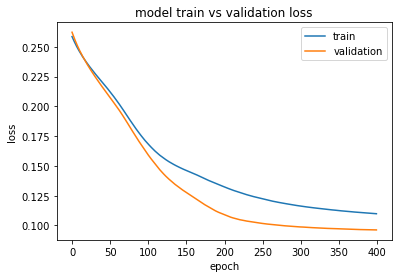

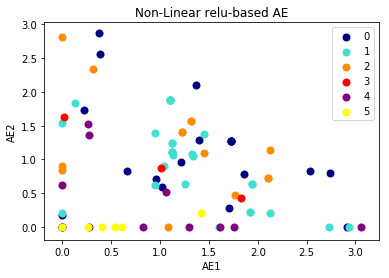

In [49]:
from keras import regularizers
#create an AE and fit it with our data using 3 neurons in the dense layer using keras' functional API
input_dim3 = X_scaled.shape[1]
encoding_dim3 = 2  
input_img3 = Input(shape=(input_dim3,))
encoded3 = Dense(encoding_dim3, activation='relu', activity_regularizer=regularizers.l1(10e-5))(input_img3)
decoded3 = Dense(input_dim3, activation='sigmoid')(encoded3)
autoencoder3 = Model(input_img3, decoded3)
autoencoder3.compile(optimizer='adam', loss='mse')
print(autoencoder3.summary())

history3 = autoencoder3.fit(X_scaled, X_scaled,
                epochs=400,
                batch_size=16,
                shuffle=True,
                validation_split=0.1,
                verbose = 0)

#plot our loss 
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# use our encoded layer to encode the training input
encoder3 = Model(input_img3, encoded3)
encoded_input3 = Input(shape=(encoding_dim3,))
decoder_layer3 = autoencoder3.layers[-1]
decoder3 = Model(encoded_input3, decoder_layer3(encoded_input3))
encoded_data3 = encoder3.predict(X_scaled)

plot3clusters(encoded_data3[:,:2], 'Non-Linear relu-based AE', 'AE')  

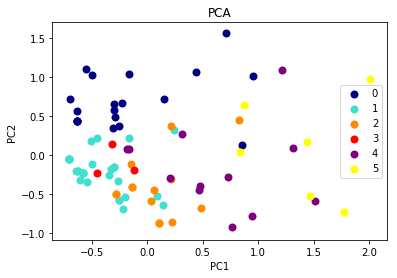

In [54]:

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(X_scaled)
plot3clusters(pca_transformed[:,:2], 'PCA', 'PC')  

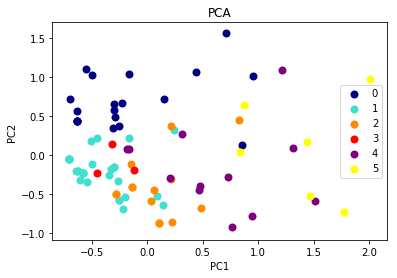

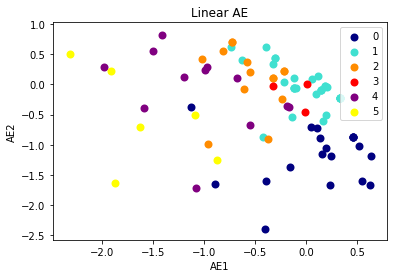

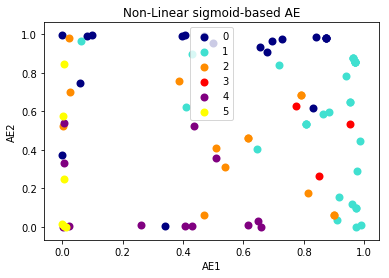

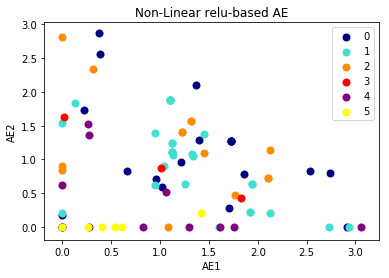

In [55]:
plot3clusters(pca_transformed[:,:2], 'PCA', 'PC')  
plot3clusters(encoded_data[:,:2], 'Linear AE', 'AE')  
plot3clusters(encoded_data2[:,:2], 'Non-Linear sigmoid-based AE', 'AE')  
plot3clusters(encoded_data3[:,:2], 'Non-Linear relu-based AE', 'AE') 

In [60]:
from sklearn import metrics
labels_true = y 
titles = ['PCA', 'Linear AE', 'Sigmoid AE', 'Relu AE']
for n_clusters_ in [6,7]:
  estimators = [('PCA'    , KMeans(n_clusters=n_clusters_), pca_transformed),
                ('AE linear' , KMeans(n_clusters=n_clusters_), encoded_data),
                ('AE sigmoid' , KMeans(n_clusters=n_clusters_), encoded_data2),
                ('AE relu', KMeans(n_clusters=n_clusters_), encoded_data3)]

  print(type(y))
  print('Number of clusters: %d' % n_clusters_)
  for name, est, data in estimators:
      X = data
      est.fit(X)
      labels = est.labels_
      print(name,':')
      print(labels[:]) 
      print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
      print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
      print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
      print("Adjusted Rand Index: %0.3f"
            % metrics.adjusted_rand_score(labels_true, labels))
      print("Adjusted Mutual Information: %0.3f"
            % metrics.adjusted_mutual_info_score(labels_true, labels))
      print("Silhouette Coefficient: %0.3f"
            % metrics.silhouette_score(X, labels))
      print()
  print()
  print('----------------------------------------------------------------------------------')
  print()
  

<class 'pandas.core.series.Series'>
Number of clusters: 6
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 145.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 143.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 146.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 146.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 142.0
Best run was number 5
PCA :
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 3 0 0 4 1 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 3 0 3 0 4 0 0 0 0 0 3 0 0 0
 3 0 0 0 0 0 0 0 0 0 5 0]
Homogeneity: 0.106
Completeness: 0.286
V-measure: 0.155
Adjusted Rand Index: -0.050
Adjusted Mutual Inf